In [1]:
import data_handler
import configs
import train
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
SEED = 7

In [2]:
train_ds, test1_ds, test2_ds = data_handler.load_datasets_synthetic()

2024-03-27 12:52:13.603529: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-03-27 12:52:15.299042: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-03-27 12:52:16.982166: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


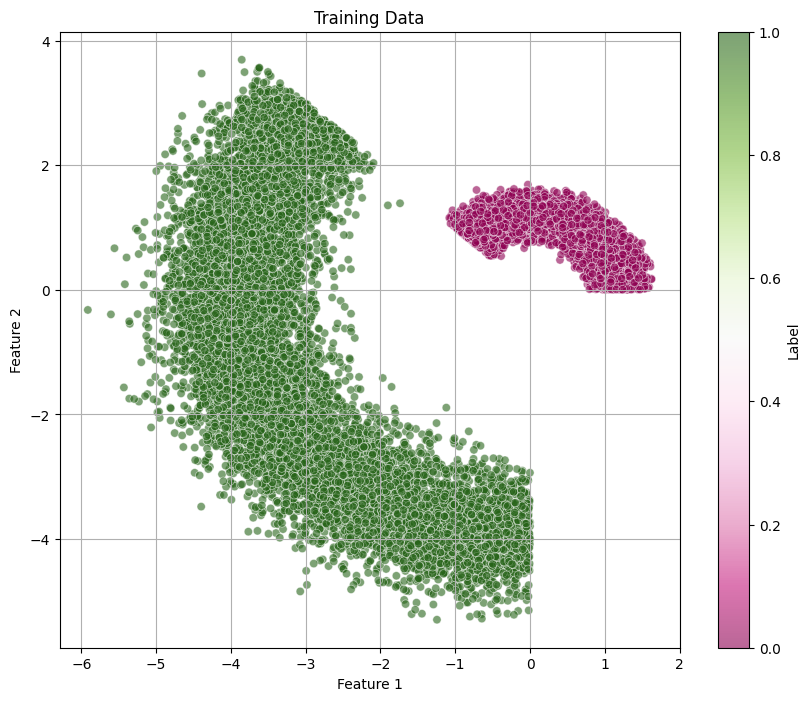

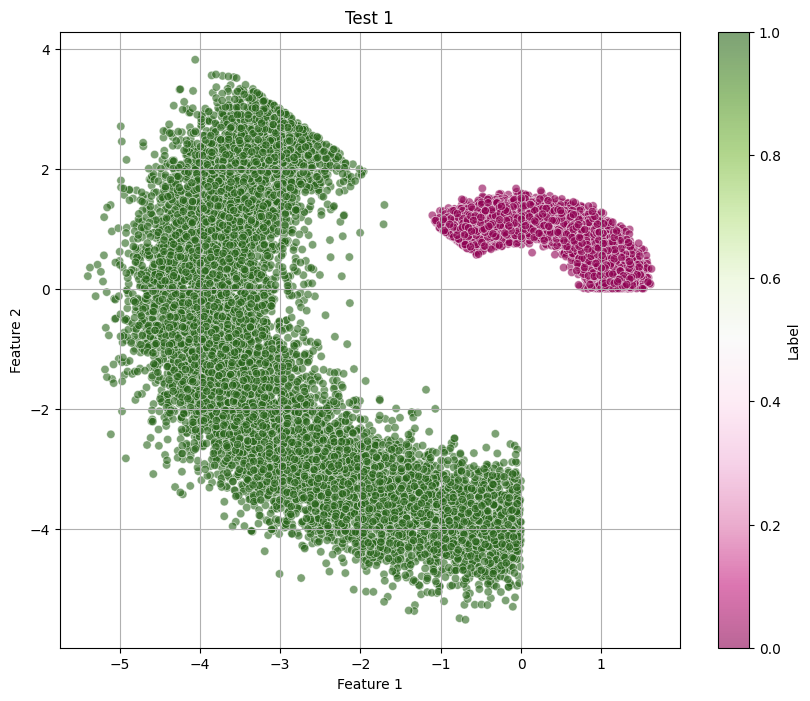

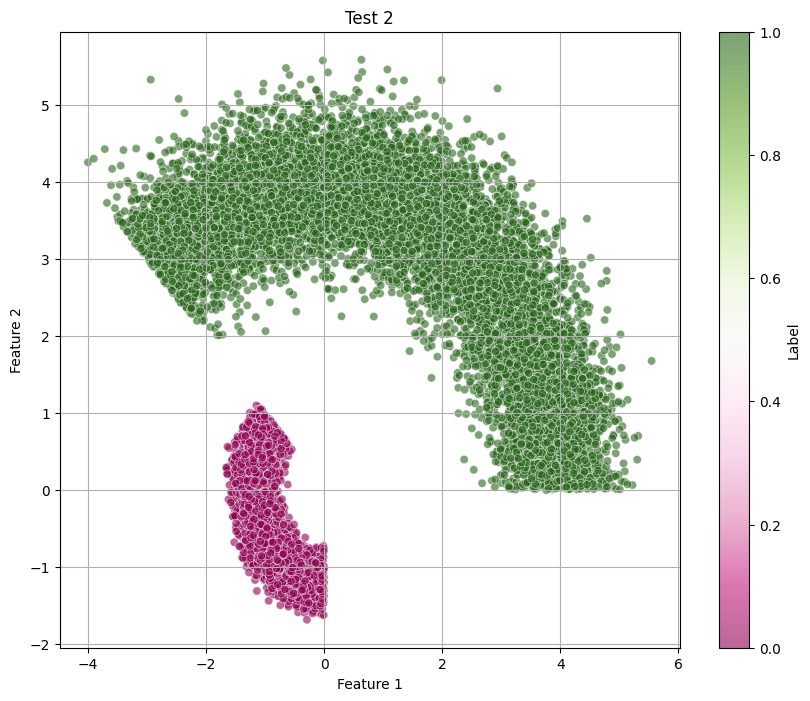

In [21]:
def visualize_data(features_array, labels_array, ids_array=None, title="Data Visualization"):
    features_array = np.array(features_array)
    labels_array = np.array(labels_array)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(features_array[:, 0], features_array[:, 1], c=labels_array, cmap='PiYG', alpha=0.6, edgecolors='w', linewidth=0.5)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(scatter, label='Label')
    
    if ids_array is not None:
        for i, id_ in enumerate(ids_array):
            plt.annotate(id_, (features_array[i, 0], features_array[i, 1]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='gray')
    
    plt.grid(True)
    plt.show()

visualize_data(train_ds['image'], train_ds['label'], title="Training Data")
visualize_data(test1_ds['image'], test1_ds['label'], title="Test 1")
visualize_data(test2_ds['image'], test2_ds['label'], title="Test 2")

In [3]:
config = configs.synthetic_experiment()
config.lambda_core = 0.0
state_pooled = train.train_and_evaluate(config, workdir=f"models_synthetic/pooled", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:epoch: 1, train_loss: 0.6293, train_accuracy: 99.37, test1_accuracy: 100.00, test2_accuracy: 10.18, core_penalty: 20.8745
INFO:absl:epoch: 2, train_loss: 0.1321, train_accuracy: 100.00, test1_accuracy: 100.00, test2_accuracy: 8.56, core_penalty: 0.2952
INFO:absl:epoch: 3, train_loss: 0.0757, train_accuracy: 99.79, test1_accuracy: 100.00, test2_accuracy: 33.98, core_penalty: 0.2350
INFO:absl:epoch: 4, train_loss: 0.3211, train_accuracy: 99.17, test1_accuracy: 100.00, test2_accuracy: 21.81, core_penalty: 0.0027
INFO:absl:epoch: 5, train_loss: 0.1425, train_accuracy: 99.98, test1_accuracy: 100.00, test2_accuracy: 30.93, core_penalty: 0.2221
INFO:absl:epoch: 6, train_loss: 0.0426, train_accuracy: 99.98, test1_accuracy: 98.88, test2_accuracy: 49.44, core_penalty: 0.0397
INFO:absl:epoch: 7, train_loss: 0.0682, train_accuracy: 99.54, test1_accuracy: 100.00, test2_accuracy: 21.85, core_penalty: 0.1078
INFO:absl:epoch: 8, train_loss: 0.0368, train_accuracy: 100.00, test1_accuracy: 99.

In [4]:
config = configs.synthetic_experiment()
state_pooled = train.train_and_evaluate(config, workdir=f"models_synthetic/core", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:epoch: 1, train_loss: 7.9006, train_accuracy: 98.47, test1_accuracy: 100.00, test2_accuracy: 1.16, core_penalty: 6.5644
INFO:absl:epoch: 2, train_loss: 37.7679, train_accuracy: 95.70, test1_accuracy: 100.00, test2_accuracy: 17.60, core_penalty: 28.7616
INFO:absl:epoch: 3, train_loss: 628.8871, train_accuracy: 89.73, test1_accuracy: 92.97, test2_accuracy: 49.39, core_penalty: 535.7748
INFO:absl:epoch: 4, train_loss: 144.4146, train_accuracy: 96.09, test1_accuracy: 98.67, test2_accuracy: 0.00, core_penalty: 77.1227
INFO:absl:epoch: 5, train_loss: 1887.8452, train_accuracy: 78.85, test1_accuracy: 63.02, test2_accuracy: 76.05, core_penalty: 1787.6924
INFO:absl:epoch: 6, train_loss: 65.9725, train_accuracy: 96.21, test1_accuracy: 98.49, test2_accuracy: 6.94, core_penalty: 37.8222
INFO:absl:epoch: 7, train_loss: 922.6086, train_accuracy: 91.30, test1_accuracy: 59.00, test2_accuracy: 49.45, core_penalty: 845.6210
INFO:absl:epoch: 8, train_loss: 17838.4707, train_accuracy: 76.34, tes

In [3]:
config = configs.synthetic_experiment()
config.lambda_core = 0.1
state_pooled = train.train_and_evaluate(config, workdir=f"models_synthetic/core01", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:epoch: 1, train_loss: 1.4500, train_accuracy: 98.43, test1_accuracy: 100.00, test2_accuracy: 4.22, core_penalty: 2.0610
INFO:absl:epoch: 2, train_loss: 0.5863, train_accuracy: 100.00, test1_accuracy: 100.00, test2_accuracy: 1.87, core_penalty: 0.0000
INFO:absl:epoch: 3, train_loss: 0.9228, train_accuracy: 99.34, test1_accuracy: 100.00, test2_accuracy: 9.34, core_penalty: 0.6449
INFO:absl:epoch: 4, train_loss: 0.8498, train_accuracy: 99.55, test1_accuracy: 100.00, test2_accuracy: 32.37, core_penalty: 1.7198
INFO:absl:epoch: 5, train_loss: 1.5584, train_accuracy: 98.50, test1_accuracy: 99.81, test2_accuracy: 8.99, core_penalty: 4.9822
INFO:absl:epoch: 6, train_loss: 1.2086, train_accuracy: 99.42, test1_accuracy: 99.98, test2_accuracy: 37.53, core_penalty: 0.3324
INFO:absl:epoch: 7, train_loss: 0.5531, train_accuracy: 99.93, test1_accuracy: 100.00, test2_accuracy: 55.76, core_penalty: 0.0630
INFO:absl:epoch: 8, train_loss: 0.3433, train_accuracy: 99.97, test1_accuracy: 96.30, te

In [4]:
config = configs.synthetic_experiment()
config.lambda_core = 0.05
state_pooled = train.train_and_evaluate(config, workdir=f"models_synthetic/core005", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:epoch: 1, train_loss: 1.3394, train_accuracy: 98.77, test1_accuracy: 100.00, test2_accuracy: 7.58, core_penalty: 5.7870
INFO:absl:epoch: 2, train_loss: 0.4905, train_accuracy: 100.00, test1_accuracy: 100.00, test2_accuracy: 3.79, core_penalty: 0.0000
INFO:absl:epoch: 3, train_loss: 0.4640, train_accuracy: 99.68, test1_accuracy: 100.00, test2_accuracy: 10.65, core_penalty: 0.2685
INFO:absl:epoch: 4, train_loss: 0.4699, train_accuracy: 99.73, test1_accuracy: 100.00, test2_accuracy: 24.46, core_penalty: 0.6867
INFO:absl:epoch: 5, train_loss: 1.3452, train_accuracy: 98.97, test1_accuracy: 99.81, test2_accuracy: 7.67, core_penalty: 4.9565
INFO:absl:epoch: 6, train_loss: 1.3097, train_accuracy: 99.29, test1_accuracy: 100.00, test2_accuracy: 41.99, core_penalty: 0.4970
INFO:absl:epoch: 7, train_loss: 0.5850, train_accuracy: 99.96, test1_accuracy: 99.96, test2_accuracy: 39.74, core_penalty: 0.1716
INFO:absl:epoch: 8, train_loss: 0.2198, train_accuracy: 99.99, test1_accuracy: 100.00, 